In [1]:
-# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/googledta/trainset.csv
/kaggle/input/googledta/testset.csv


In [2]:
import pandas as pd
train_data=pd.read_csv('/kaggle/input/googledta/trainset.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


Here we can use any one of the feature to predict that feature's price after 1 month. We will choose the Open feature here. So we require only values of Open feature.

In [8]:
train=train_data.iloc[:,1:2].values

In [10]:
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_sc=sc.fit_transform(train)

In [13]:
train_sc

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [38]:
import numpy as np
X=[]
y=[]
for i in range(60,1258):
    X.append(train_sc[i-60:i,0])
    y.append(train_sc[i,0])
X,y=np.array(X),np.array(y)

In [39]:
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [42]:
X.shape

(1198, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [44]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [87]:
model.fit(X,y,epochs=50,batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0023
Epoch 2/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0025
Epoch 3/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0023
Epoch 4/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0024
Epoch 5/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0022
Epoch 6/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0024
Epoch 7/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0023
Epoch 8/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0021
Epoch 9/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0021
Epoch 10/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0023
Epoch 11/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0024
Epoch 12/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0

In [46]:
data_test=pd.read_csv('/kaggle/input/googledta/testset.csv')

In [75]:
real_stock_price=data_test.iloc[:,1:2].values
real_stock_price.shape

(125, 1)

In [51]:
dataset_total=pd.concat((train_data['Open'],data_test['Open']),axis=0)

In [52]:
len(dataset_total)

1384

In [54]:
len(data_test)

125

In [60]:
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values

In [63]:
inputs=inputs.reshape(-1,1)

In [64]:
inputs.shape

(185, 1)

In [65]:
inputs=sc.transform(inputs)

In [79]:
X_test=[]
for i in range(60,185):
    X_test.append(inputs[i-60:i,0])
    
X_test=np.array(X_test)

In [80]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [81]:
X_test.shape

(125, 60, 1)

In [88]:
Predicted_stock_price=model.predict(X_test)

In [89]:
Predicted_stock_price=sc.inverse_transform(Predicted_stock_price)

In [90]:
Predicted_stock_price.shape

(125, 1)

**Visualizing the results**

In [91]:
import matplotlib.pyplot as plt

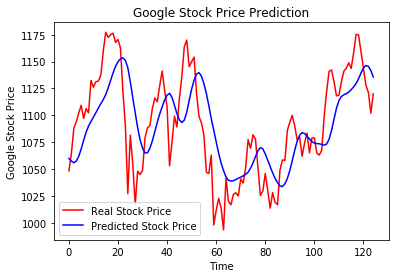

In [92]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(Predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

**As we can see our RNN model has done quite well here in forecasting the google stock price for next 125 days.**